In [1]:
#!user/bin/env python
# -*- coding:utf-8 -*-

In [2]:
import numpy as np
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.manifold import TSNE
from matplotlib import pyplot as plt

In [3]:
#加载数据
data = load_digits()
x = data.data
y = data.target

In [4]:
#PCA
pca  = PCA(n_components=2)
x_pca = pca.fit_transform(x)
#t-SNE
tsne = TSNE(n_components=2, init='pca')
x_tsne = tsne.fit_transform(x)
#LDA
lda = LinearDiscriminantAnalysis(n_components=2)
x_lda = lda.fit_transform(x, y)

d:\Users\69243\anaconda3\envs\test\lib\site-packages\sklearn\manifold\_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
d:\Users\69243\anaconda3\envs\test\lib\site-packages\sklearn\manifold\_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


In [5]:
from sklearn.preprocessing import MinMaxScaler
x_pca_scaler = MinMaxScaler().fit_transform(x_pca)
x_tsne_scaler = MinMaxScaler().fit_transform(x_tsne)
x_lda_scaler = MinMaxScaler().fit_transform(x_lda)

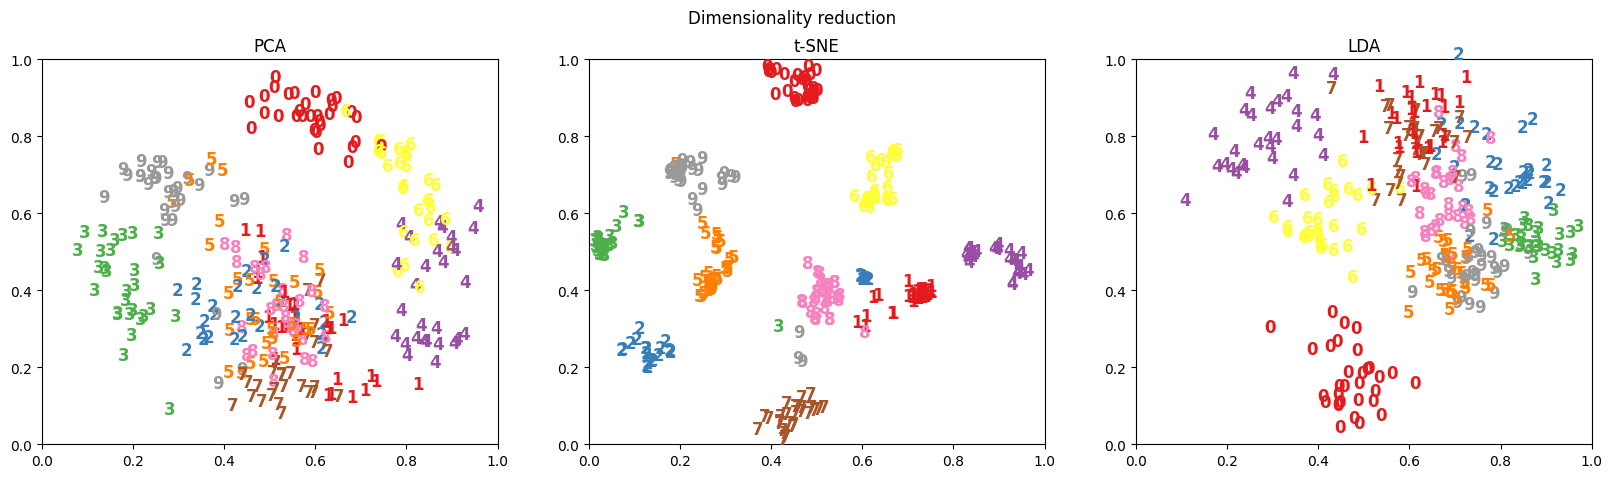

In [6]:
#绘制PCA、t-SNE和LDA效果对比
figure = plt.figure(figsize=(20,5))
ax1 = figure.add_subplot(1, 3, 1)
ax2 = figure.add_subplot(1, 3, 2)
ax3 = figure.add_subplot(1, 3, 3)

for i in range(300):
    ax1.text(x_pca_scaler[i,0],x_pca_scaler[i,1],str(y[i]),color=plt.cm.Set1(y[i]/10.),
            fontdict={'weight': 'bold', 'size': 12})
    ax2.text(x_tsne_scaler[i,0],x_tsne_scaler[i,1],str(y[i]),color=plt.cm.Set1(y[i]/10.),
            fontdict={'weight': 'bold', 'size': 12})
    ax3.text(x_lda_scaler[i,0],x_lda_scaler[i,1],str(y[i]),color=plt.cm.Set1(y[i]/10.),
            fontdict={'weight': 'bold', 'size': 12})

ax1.set_title("PCA")
ax2.set_title("t-SNE")
ax3.set_title("LDA")
figure.suptitle('Dimensionality reduction')
plt.show()